In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as tick
import seaborn as sns

In [10]:
data = pd.read_excel("world-population.xlsm")
data.head()

,Year,Population
0,1960,3028654024
1,1961,3068356747
2,1962,3121963107
3,1963,3187471383
4,1964,3253112403


In [11]:
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}'.format(val)
  
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # changing  values like as 6.0B to 6 to avoid zero presence
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
          
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

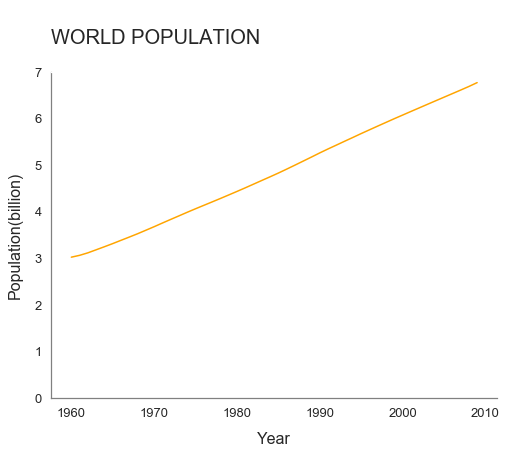

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('w')
year = data['Year']
population = data['Population']
ax.plot(year, population,color = 'orange' )
ax.set_title('\nWORLD POPULATION\n', fontsize=20,  loc='left')
ax.set_ylabel('Population(billion)', fontsize=16, labelpad=12)
ax.set_xlabel('Year', fontsize=16, labelpad=12)
ax.grid(False)
#ax.yaxis.grid(color='gray', linewidth=0.2)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax = plt.gca()
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=7000000000)
ax.tick_params(axis='x', labelsize=13) 
ax.tick_params(axis='y', labelsize=13) 
ax.ticklabel_format(useOffset=False) 
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show();


Step Chart

In [25]:
data2 = pd.read_excel("Inflation.xlsx")
data2.head()

,Month,Year_2020
0,Jan,2.49
1,Feb,2.33
2,Mar,1.54
3,Apr,0.33
4,May,0.12


In [26]:
month = data2['Month']
inflation = data2['Year_2020']

In [27]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

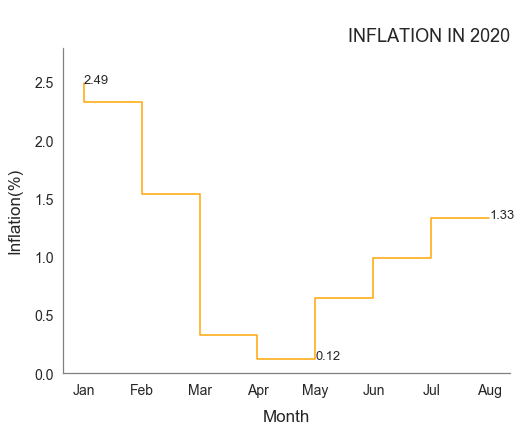

In [33]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize = (8,6))
ax.set_facecolor('w')
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=2.8)
#markers_on = [2.49, 0.12, 1.33] - top, low and where we are right now
plt.step(month, inflation, label='pre (default)', color = 'orange' )
#customizing ticks, labels and title.
ax.tick_params(axis='x', labelsize=14) 
ax.tick_params(axis='y', labelsize=14) 
ax.set_ylabel('Inflation(%)', fontsize=17, labelpad=12)
ax.set_xlabel('Month', fontsize=17, labelpad=12)
plt.title('\nINFLATION IN 2020',fontsize=18, loc='right')
for a,b in zip(month, inflation): 
    if b==0.12 or b == 1.33 or b == 2.49:
        plt.text(a, b, str(b), fontsize=13)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')   
plt.show()